In [ ]:
import pandas as pd
from collections import Counter
import re
import numpy as np
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import f1_score, accuracy_score 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import nltk
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
df=pd.read_csv("C:/Users/Nandini/Desktop/sa/SourceCode/Combining and Modeling/final.csv")

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
import pandas as pd
import os
import gensim
import nltk 
from sklearn.linear_model import LogisticRegression


In [ ]:
df=pd.read_csv("C:/Users/Nandini/Desktop/sa/SourceCode/Combining and Modeling/final.csv")

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
for sentences in df['body']:
    print(sentences)

In [ ]:
#sentence="my text"
#tokens = nltk.word_tokenize(sentence)
#tokens
tokens = [nltk.word_tokenize(sentences) for sentences in df['body']]

In [ ]:
model = gensim.models.Word2Vec(tokens, size=300, min_count=1, workers=4)
print("\n Training the word2vec model...\n")

In [ ]:
 model.save("word2vec.model")

In [ ]:
model = gensim.models.Word2Vec.load("word2vec.model")
model.train(df.body, total_examples=len(df.body), epochs=4)

In [ ]:
 model.save("word2vecbody.model")
import numpy as np
np.load('word2vecbody.model.wv.vectors.npy')

In [ ]:
df.columns

In [ ]:
train = []
#getting only the first 4 columns of the file 
for sentences in df[df.columns[0:4]].values:
    train.extend(sentences)
#print (train)

#Create an array of tokens using nltk
#for sentences in train:
#    tokens = tokens.append(nltk.word_tokenize(str(sentences)))
tokens = [nltk.word_tokenize(str(sentences)) for sentences in train]

In [ ]:
model = gensim.models.Word2Vec(tokens, size=300, min_count=1, workers=4)
print("\n Training the word2vec model...\n")
#model = gensim.models.Word2Vec.load("word.model")
model.train(tokens, total_examples=len(tokens), epochs=4)
model.save("word.model")

In [ ]:
# The two datasets must be the same size
model = gensim.models.Word2Vec.load("word.model")
max_dataset_size = len(model.trainables.syn1neg)


clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(model.trainables.syn1neg, df.fakeness[:max_dataset_size])

# Prediction of the first 15 samples of all features
predict = clf.predict(model.trainables.syn1neg[:15, :])
# Calculating the score of the predictions
score = clf.score(model.trainables.syn1neg, Y_dataset[:max_dataset_size])
print("\nPrediction word2vec : \n", predict)
print("Score word2vec : \n", score)

In [ ]:
from sklearn.cross_validation import train_test_split
#X_headline_train, X_headline_test, y_headline_train, y_headline_test = train_test_split(X_headline,Y, test_size = 0.25, random_state=420)
X_train, X_test, y_train, y_test = train_test_split(model.trainables.syn1neg,df['fakeness'], test_size = 0.25, random_state=420)

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\Nandini\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
df=pd.read_csv("C:/Users/Nandini/Desktop/sa/SourceCode/Combining and Modeling/final.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,body,fakeness,headline,id,published
0,0,0,Print They should pay all the back all the mon...,1,Muslims BUSTED: They Stole Millions In Govâ€™t...,6a175f46bcd24d39b3e962ad0f29936721db70db,2016-10-26T21:41:00.000+03:00
1,1,1,Why Did Attorney General Loretta Lynch Plead T...,1,Re: Why Did Attorney General Loretta Lynch Ple...,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,2016-10-29T08:47:11.259+03:00
2,2,2,Red State : \r\r\nFox News Sunday reported thi...,1,BREAKING: Weiner Cooperating With FBI On Hilla...,c70e149fdd53de5e61c29281100b9de0ed268bc3,2016-10-31T01:41:49.479+02:00
3,3,3,Email Kayla Mueller was a prisoner and torture...,1,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,7cf7c15731ac2a116dd7f629bd57ea468ed70284,2016-11-01T05:22:00.000+02:00
4,4,4,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,1,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0206b54719c7e241ffe0ad4315b808290dbe6c0f,2016-11-01T21:56:00.000+02:00


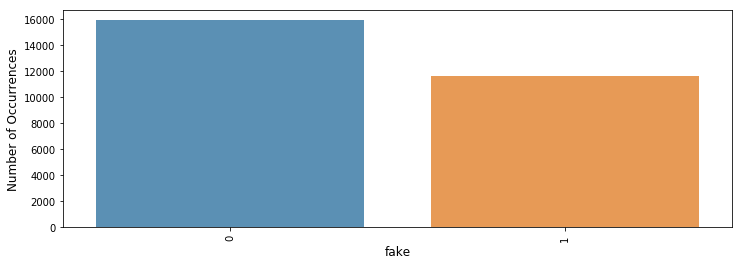

In [3]:
cnt_pro = df['fakeness'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('fake', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [4]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['body'] = df['body'].apply(cleanText)

In [5]:
train, test = train_test_split(df, test_size=0.3, random_state=42)
import nltk
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['body']), tags=[r.fakeness]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['body']), tags=[r.fakeness]), axis=1)

In [6]:
train_tagged.values[3]

TaggedDocument(words=['rescuers', 'on', 'the', 'indonesian', 'island', 'of', 'lombok', 'have', 'been', 'struggling', 'to', 'reach', 'possible', 'survivors', 'after', 'the', 'devastating', 'earthquake', 'due', 'to', 'lack', 'of', 'equipment', 'in', 'some', 'districts', 'in', 'northern', 'lombok', 'authorities', 'said', 'more', 'than', 'half', 'the', 'homes', 'had', 'been', 'destroyed', 'or', 'badly', 'damaged', 'by', 'the', 'quake', 'on', 'sunday', 'which', 'has', 'killed', 'at', 'least', '98', 'people', 'and', 'injured', '269.', 'there', 'was', 'massive', 'damage', 'said', 'sutopo', 'purwo', 'nugroho', 'of', 'the', 'disaster', 'management', 'agency', 'and', 'some', 'areas', 'were', 'unreachable', 'rescue', 'teams', 'were', 'trying', 'to', 'dig', 'up', 'bodies', 'from', 'underneath', 'mosque', 'in', 'the', 'village', 'of', 'lading-lading', 'the', 'buildingâ€™s', 'green', 'dome', 'was', 'perched', 'on', 'top', 'of', 'slabs', 'of', 'flattened', 'concrete', 'about', '40', 'people', 'were',

In [7]:
import multiprocessing
cores = multiprocessing.cpu_count()

In [8]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 19327/19327 [00:00<00:00, 1388236.83it/s]


In [9]:
#time
for epoch in range(45):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 19327/19327 [00:00<00:00, 1940334.95it/s]


In [10]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [11]:
y_train_dbow, X_train_dbow = vec_for_learning(model_dbow, train_tagged)
y_test_dbow, X_test_dbow = vec_for_learning(model_dbow, test_tagged)
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train_dbow, y_train_dbow)
y_pred_dbow = logreg.predict(X_test_dbow)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test_dbow, y_pred_dbow))
print('Testing F1 score: {}'.format(f1_score(y_test_dbow, y_pred_dbow, average='weighted')))

Testing accuracy 0.612942170711095
Testing F1 score: 0.5926642075536247


In [12]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 19327/19327 [00:00<00:00, 1761709.77it/s]


In [13]:
for epoch in range(45):
    model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha

100%|██████████| 19327/19327 [00:00<00:00, 1490819.56it/s]


In [14]:
y_train_dm, X_train_dm = vec_for_learning(model_dmm, train_tagged)
y_test_dm, X_test_dm = vec_for_learning(model_dmm, test_tagged)
logreg.fit(X_train_dm, y_train_dm)
y_pred_dm = logreg.predict(X_test_dm)
print('Testing accuracy %s' % accuracy_score(y_test_dm, y_pred_dm))
print('Testing F1 score: {}'.format(f1_score(y_test_dm, y_pred_dm, average='weighted')))

Testing accuracy 0.9498973801762647
Testing F1 score: 0.9498814470291072


In [15]:
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [16]:
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])

In [17]:
def get_vectors(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [18]:
y_train, X_train = get_vectors(new_model, train_tagged)
y_test, X_test = get_vectors(new_model, test_tagged)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.9414463358686467
Testing F1 score: 0.9414706890767734


C:\Users\Nandini\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Nandini\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


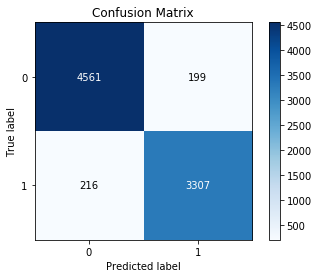

confusion matrix of logistic regression of Doc2vec using distributed memory


C:\Users\Nandini\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Nandini\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


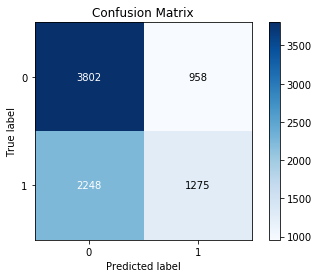

confusion matrix of logistic regression of Doc2vec using distributed bag of words


C:\Users\Nandini\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Nandini\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


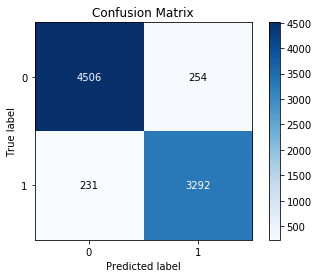

confusion matrix of logistic regression of Doc2vec combining both models


In [23]:
import scikitplot.plotters as skplt
def plot_cmat(y_test, y_pred):
    skplt.plot_confusion_matrix(y_test,y_pred)
    plt.show()
    
plot_cmat(y_test_dm, y_pred_dm)
print("confusion matrix of logistic regression of Doc2vec using distributed memory")
plot_cmat(y_test_dbow, y_pred_dbow)
print("confusion matrix of logistic regression of Doc2vec using distributed bag of words")
plot_cmat(y_test, y_pred)
print("confusion matrix of logistic regression of Doc2vec combining both models")


In [25]:
C = 1.0  
from sklearn import svm
svc = svm.SVC(kernel='linear', C=C).fit(X_train_dm, y_train_dm)
y_pred= svc.predict(X_test_dm)
print('Testing accuracy %s' % accuracy_score(y_test_dm, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test_dm, y_pred, average='weighted')))

Testing accuracy 0.9489315465411083
Testing F1 score: 0.9489114179945066


C:\Users\Nandini\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Nandini\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


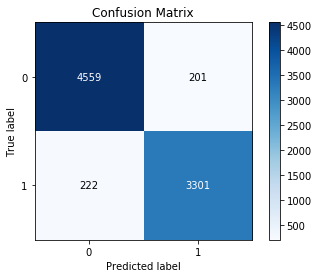

confusion matrix of SVM of Doc2vec using distributed memory


In [27]:
plot_cmat(y_test_dm, y_pred)
print("confusion matrix of SVM of Doc2vec using distributed memory")